In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

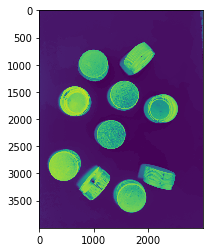

In [2]:
origin = cv2.imread("./resource/1.jpg")
hsv = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)

lower_blue = np.array([10,50,50])
upper_blue = np.array([180,255,255])
mask = cv2.inRange(hsv,lower_blue,upper_blue)
img = cv2.resize(mask,(300,300))
h,s,v = cv2.split(hsv)
plt.imshow(s)

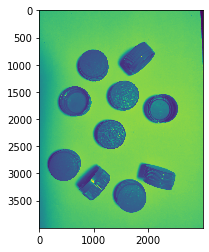

In [3]:
gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
gray = s

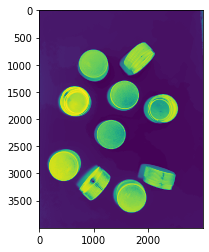

In [4]:
sblur = cv2.blur(s,(15,15))
plt.imshow(sblur)

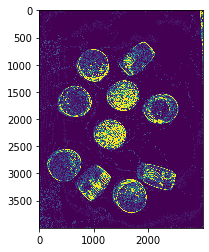

In [5]:
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)

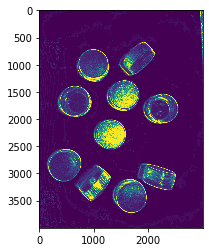

In [6]:
blurred = cv2.medianBlur(gradient, 9)
plt.imshow(blurred)

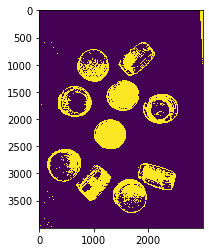

In [7]:
(_, thresh) = cv2.threshold(blurred, 35, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

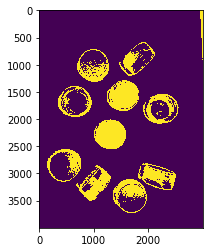

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
cl = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(cl)

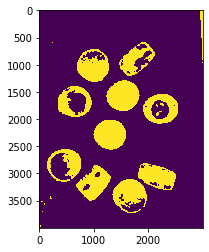

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=8)
closed = cv2.dilate(closed, None, iterations=8)
plt.imshow(closed)

----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
10
[902, 691, 688, 963, 602, 676, 638, 690, 654, 935]


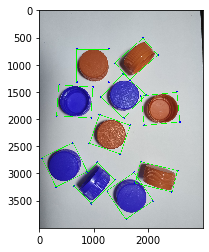

In [12]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
ct = 0
ls = []
res = origin
for c in cnts:
    if len(c) <= 200:
        continue
#     print(c)
    ct = ct + 1
    ls.append(len(c))
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    point_color = (0, 0, 255)
    for i in box:
        res = cv2.circle(res,(i[0],i[1]),15,point_color,8)
    # draw a bounding box arounded the detected barcode and display the image
    res = cv2.drawContours(res, [box], -1, (0, 255, 0), 10)
plt.imshow(res)
print(ct)
print(ls)

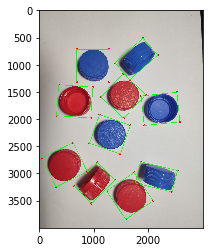

In [13]:
plt.imshow(cv2.cvtColor(origin,cv2.COLOR_BGR2RGB))